In [1]:
%pip install scikit-learn
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("american_bankruptcy.csv")
df

company_name status_label  year       X1       X2      X3       X4  \
0              C_1        alive  1999  511.267  833.107  18.373   89.031   
1              C_1        alive  2000  485.856  713.811  18.577   64.367   
2              C_1        alive  2001  436.656  526.477  22.496   27.207   
3              C_1        alive  2002  396.412  496.747  27.172   30.745   
4              C_1        alive  2003  432.204  523.302  26.680   47.491   
...            ...          ...   ...      ...      ...     ...      ...   
78677       C_8971        alive  2014  233.211   43.338  14.094   45.615   
78678       C_8971        alive  2015  105.559   59.184  42.592  202.133   
78679       C_8971        alive  2016   63.971   69.074  65.057   79.051   
78680       C_8971        alive  2017  135.207   66.527  65.330   69.171   
78681       C_8971        alive  2018   82.589   68.817  65.201   67.262   

            X5       X6       X7  ...        X9       X10      X11      X12  \
0      336.018   35.163  128.348  ...  1024.333   740.998  180.447   70.658   
1      320.590   18.531  115.187  ...   874.255   701.854  179.987   45.790   
2      286.588  -58.939   77.528  ...   638.721   710.199  217.699    4.711   
3      259.954  -12.410   66.322  ...   606.337   686.621  164.658    3.573   
4      247.245    3.504  104.661  ...   651.958   709.292  248.666   20.811   
...        ...      ...      ...  ...       ...       ...      ...      ...   
78677    3.376   25.261   22.846  ...   104.223  1099.101  184.666   31.521   
78678    2.288  129.688   54.611  ...   291.153  1865.926  770.103  159.541   
78679    2.581   -1.442   42.467  ...   169.858  1746.235  683.985   13.994   
78680    2.013  -20.401   27.217  ...   161.884  1736.110  694.035    3.841   
78681    2.112  -50.946   45.839  ...   160.513  1625.370  632.122    2.061   

           X13      X14      X15       X16      X17      X18  
0      191.226  163.816  201.026  1024.333  401.483  935.302  
1      160.444  125.392  204.065   874.255  361.642  809.888  
2      112.244  150.464  139.603   638.721  399.964  611.514  
3      109.590  203.575  124.106   606.337  391.633  575.592  
4      128.656  131.261  131.884   651.958  407.608  604.467  
...        ...      ...      ...       ...      ...      ...  
78677   60.885   28.197   28.095   104.223  225.887   58.608  
78678  231.969   88.128  157.783   291.153  880.327   89.020  
78679  100.784   85.765  156.341   169.858  770.233   90.807  
78680   95.357   82.010  135.941   161.884  776.697   92.713  
78681   91.696   79.365   84.995   160.513  712.687   93.251  

[78682 rows x 21 columns]

In [4]:
# Verificando algumas informacoes sobre os dados de cada coluna da tabela, para entede-los 
# e assim possibilitar o correto pre-processamento

vis = pd.DataFrame(df.dtypes, columns=['dtype'])
vis['missing values qtt'] = df.isnull().sum().values
vis['unique values qtt'] = df.nunique().values

desc = pd.DataFrame(df.describe(include='all').transpose())
vis['min value'] = desc['min'].values
vis['max value'] = desc['max'].values

vis

dtype  missing values qtt  unique values qtt min value  \
company_name   object                   0               8971       NaN   
status_label   object                   0                  2       NaN   
year            int64                   0                 20    1999.0   
X1            float64                   0              65895     -7.76   
X2            float64                   0              65690  -366.645   
X3            float64                   0              36010       0.0   
X4            float64                   0              59060  -21913.0   
X5            float64                   0              38898       0.0   
X6            float64                   0              55550  -98696.0   
X7            float64                   0              49577    -0.006   
X8            float64                   0              77580    0.0001   
X9            float64                   0              68596 -1964.999   
X10           float64                   0              71521     0.001   
X11           float64                   0              39741    -0.023   
X12           float64                   0              56949  -25913.0   
X13           float64                   0              64952  -21536.0   
X14           float64                   0              58685     0.001   
X15           float64                   0              72062 -102362.0   
X16           float64                   0              68596 -1964.999   
X17           float64                   0              64640     0.001   
X18           float64                   0              70840  -317.197   

               max value  
company_name         NaN  
status_label         NaN  
year              2018.0  
X1              169662.0  
X2              374623.0  
X3               28430.0  
X4               81730.0  
X5               62567.0  
X6              104821.0  
X7               65812.0  
X8            1073390.54  
X9              511729.0  
X10             531864.0  
X11             166250.0  
X12              71230.0  
X13             137106.0  
X14             116866.0  
X15             402089.0  
X16             511729.0  
X17             337980.0  
X18             481580.0

In [5]:
# Na tabela printada acima podemos perceber que não há dados faltando no dataframe e também que
# nem todas as colunas vão ser usadas para fazer a inferência

In [6]:
# A coluna 'status_label'(mostra se o banco está falido ou não) é o target, ou seja, o "gabarito", a resposta final
df['status_label'] = df['status_label'].replace('alive', 1)
df['status_label'] = df['status_label'].replace('failed', 0)

target = df['status_label']
target

0        1
1        1
2        1
3        1
4        1
        ..
78677    1
78678    1
78679    1
78680    1
78681    1
Name: status_label, Length: 78682, dtype: int64

In [7]:
# As colunas 'company_name' e 'year' não vão ser usadas

df_pre_proc = df.drop(['company_name', 'year', 'status_label'] , axis=1)

df_pre_proc

X1       X2      X3       X4       X5       X6       X7        X8  \
0      511.267  833.107  18.373   89.031  336.018   35.163  128.348  372.7519   
1      485.856  713.811  18.577   64.367  320.590   18.531  115.187  377.1180   
2      436.656  526.477  22.496   27.207  286.588  -58.939   77.528  364.5928   
3      396.412  496.747  27.172   30.745  259.954  -12.410   66.322  143.3295   
4      432.204  523.302  26.680   47.491  247.245    3.504  104.661  308.9071   
...        ...      ...     ...      ...      ...      ...      ...       ...   
78677  233.211   43.338  14.094   45.615    3.376   25.261   22.846  756.4827   
78678  105.559   59.184  42.592  202.133    2.288  129.688   54.611  527.5750   
78679   63.971   69.074  65.057   79.051    2.581   -1.442   42.467  578.8868   
78680  135.207   66.527  65.330   69.171    2.013  -20.401   27.217  412.6241   
78681   82.589   68.817  65.201   67.262    2.112  -50.946   45.839  354.1786   

             X9       X10      X11      X12      X13      X14      X15  \
0      1024.333   740.998  180.447   70.658  191.226  163.816  201.026   
1       874.255   701.854  179.987   45.790  160.444  125.392  204.065   
2       638.721   710.199  217.699    4.711  112.244  150.464  139.603   
3       606.337   686.621  164.658    3.573  109.590  203.575  124.106   
4       651.958   709.292  248.666   20.811  128.656  131.261  131.884   
...         ...       ...      ...      ...      ...      ...      ...   
78677   104.223  1099.101  184.666   31.521   60.885   28.197   28.095   
78678   291.153  1865.926  770.103  159.541  231.969   88.128  157.783   
78679   169.858  1746.235  683.985   13.994  100.784   85.765  156.341   
78680   161.884  1736.110  694.035    3.841   95.357   82.010  135.941   
78681   160.513  1625.370  632.122    2.061   91.696   79.365   84.995   

            X16      X17      X18  
0      1024.333  401.483  935.302  
1       874.255  361.642  809.888  
2       638.721  399.964  611.514  
3       606.337  391.633  575.592  
4       651.958  407.608  604.467  
...         ...      ...      ...  
78677   104.223  225.887   58.608  
78678   291.153  880.327   89.020  
78679   169.858  770.233   90.807  
78680   161.884  776.697   92.713  
78681   160.513  712.687   93.251  

[78682 rows x 18 columns]

<Axes: >

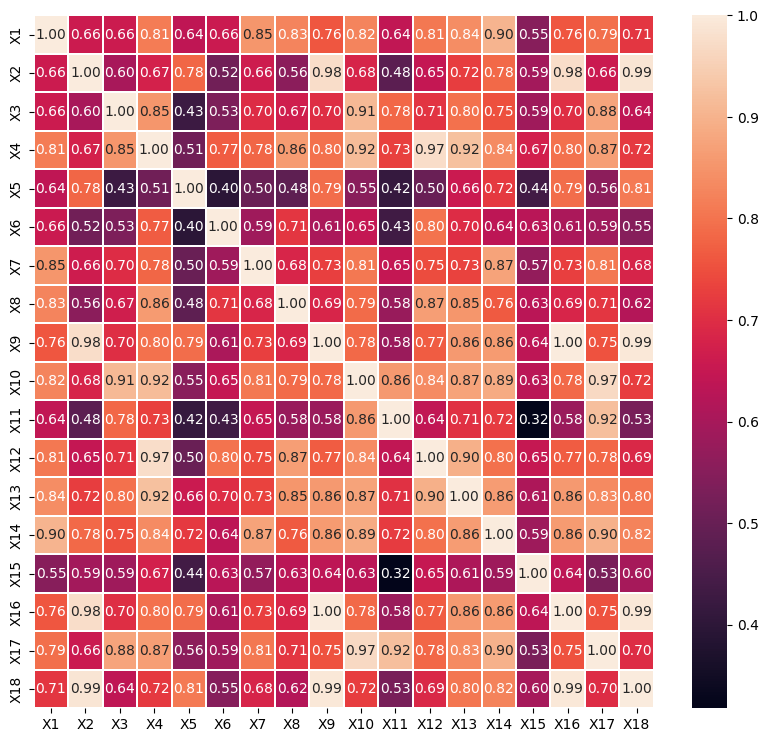

In [8]:
# variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
# data = df[variables]
correlation_matrix = df_pre_proc.corr()
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.3)

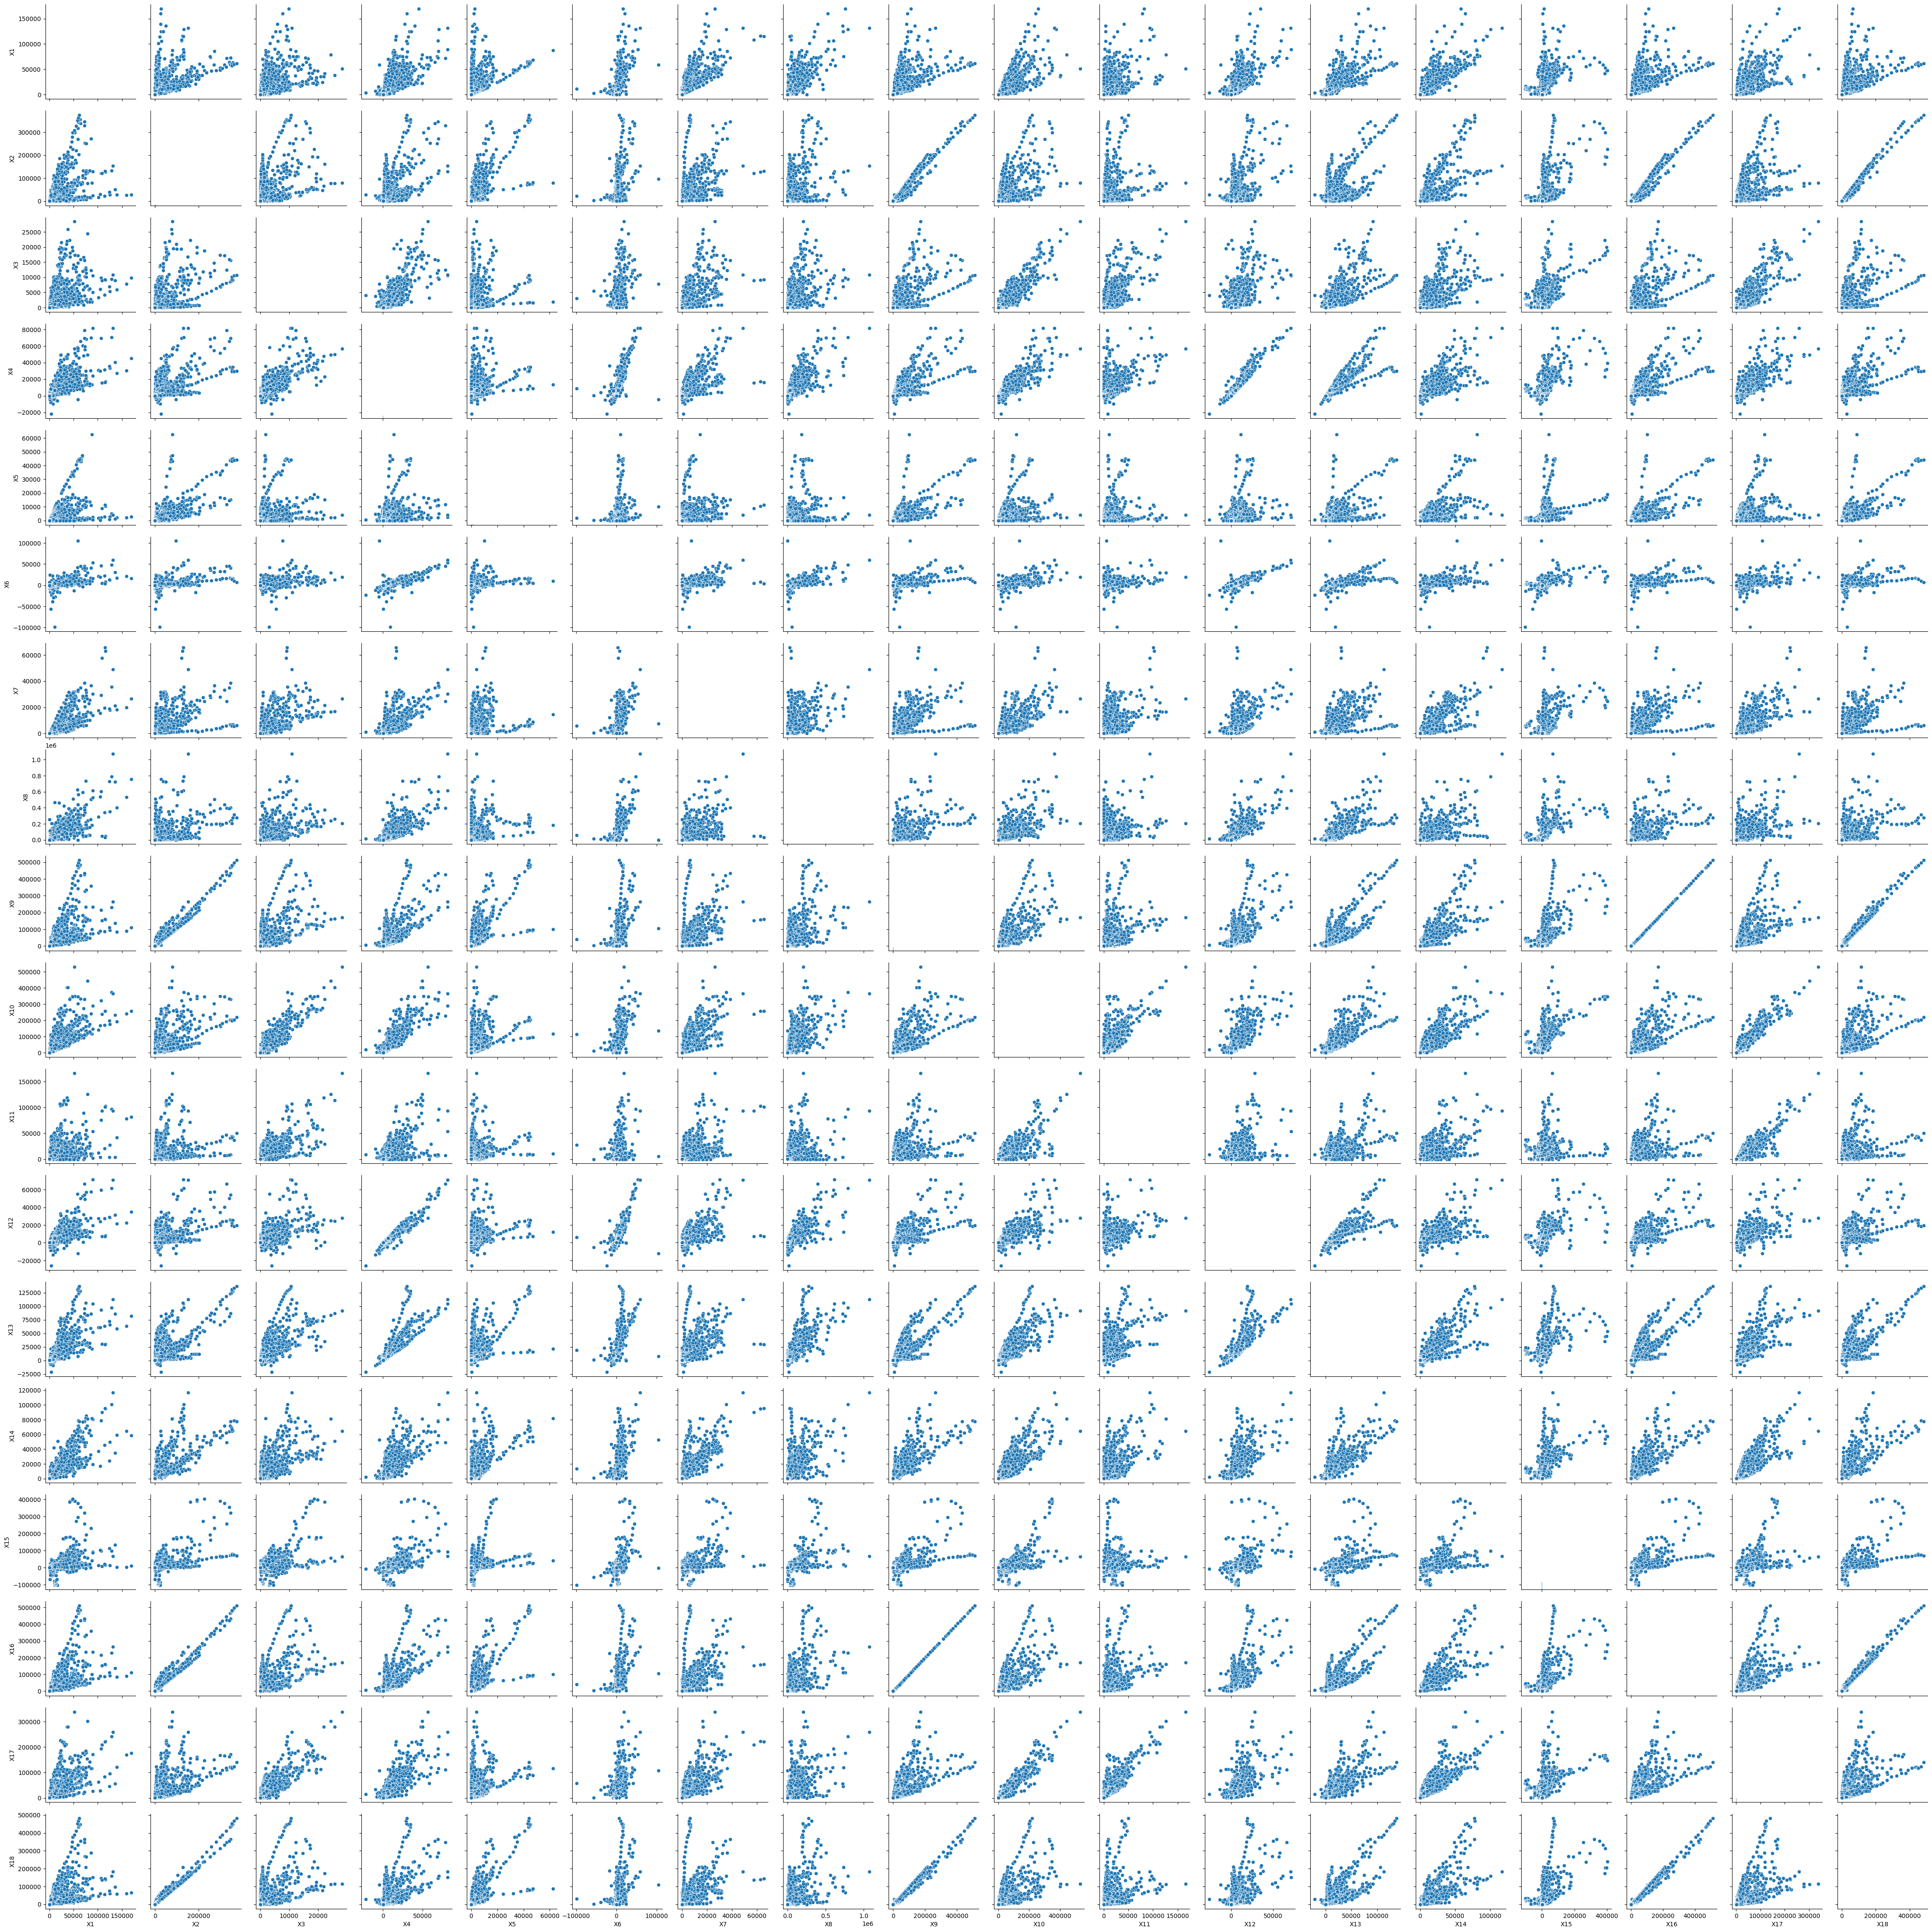

In [9]:
sns.pairplot(df_pre_proc)

In [10]:
# Foi escolhido dividir os dados em 70% para treino dos modelos e 30% para realizar os testes

# f(X) -> y
X_train, X_test = train_test_split(df_pre_proc, test_size=0.3)
y_train, y_test = train_test_split(target, test_size=0.3)

In [15]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 12, 15, 17]
}

In [16]:
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='roc_auc', cv=10)

In [17]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10, 12, 15, 17]},
             scoring='roc_auc')

In [19]:
knn_grid.best_params_

{'n_neighbors': 3}

In [21]:
y_pred_knn = knn_grid.predict(X_test)

In [22]:
roc_auc_score(y_test, y_pred_knn)

0.5005438865921383

In [24]:
accuracy_score(y_test, y_pred_knn)

0.9234484219445033